### IMPORTS

In [1]:
from Inference import BBVI 

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np

### EXAMPLE

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [35]:
x_data = torch.distributions.uniform.Uniform(-1.0, 1.0).sample([200,1]).to(device)

In [62]:
A = 1.2
b = -0.5
y_data = A*x_data + b
y_data = y_data + torch.distributions.normal.Normal(0,0.1).sample([200,1]).to(device)

In [38]:
Net = BBVI.VariationalNetwork(input_size=1, output_size=1, layer_width=1, nb_layers=1, device=device)
Net.activation = None

In [76]:
Net.sample_parameters(1)
pass

In [77]:
out = Net(x_data)

In [81]:
Net.linear1.prior_weight_mu

Parameter containing:
tensor([[0.]], device='cuda:0')

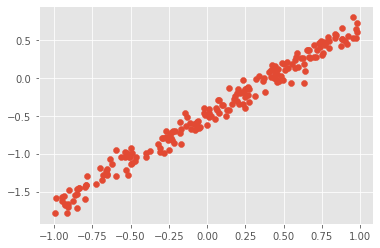

In [70]:
plt.scatter(x_data.detach().cpu(), y_data.detach().cpu()) 

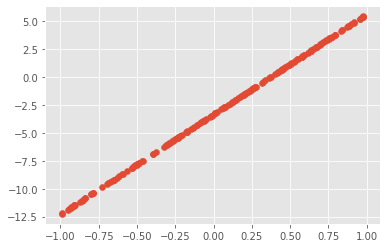

In [69]:
plt.scatter(x_data.detach().cpu(), out[0,:,:].detach().cpu()) 

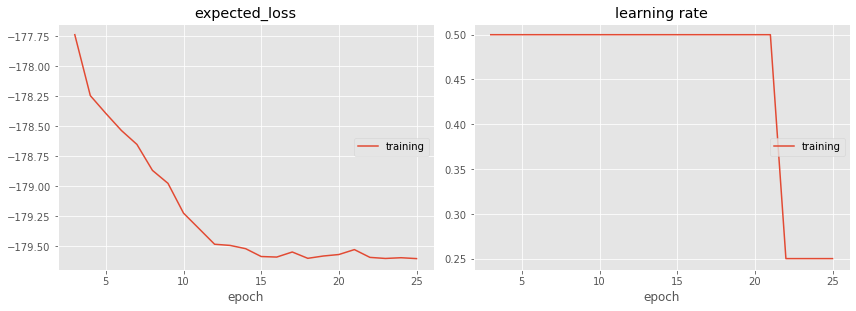

expected_loss:
training   (min: -179.604, max: 26840.459, cur: -179.604)

learning rate:
training   (min:    0.250, max:    0.500, cur:    0.250)


KeyboardInterrupt: 

In [82]:
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.5}
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 2, 'factor': 0.5}

voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params, min_lr=0.00001)
Net = voptimizer.run((x_data,y_data), n_epoch=10000, n_iter=50, n_ELBO_samples=20, plot=True)

In [83]:
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)

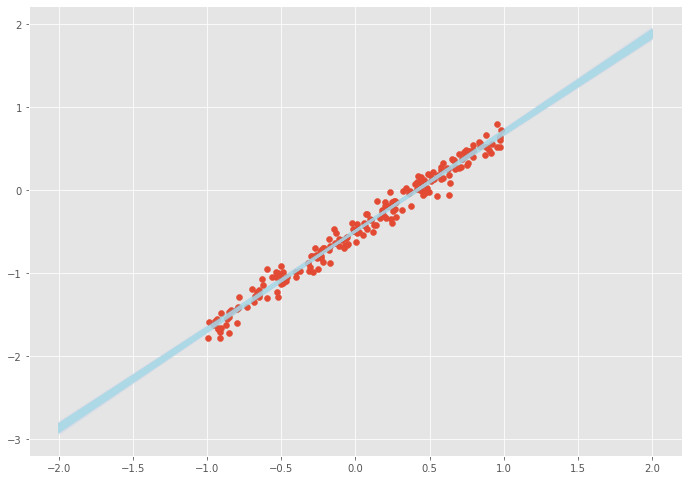

In [84]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    Net.sample_parameters()

    y_test = Net.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue')